### **n-gram language model:**
<br>An n-gram language model is a type of probabilistic language model used in natural language processing (NLP) and computational linguistics. It predicts the probability of a word based on the history of the previous $(n−1)$ words. This model is based on the Markov assumption, which posits that the probability of a word depends only on the previous $(n−1)$ words.

Reference:
<br>https://www.geeksforgeeks.org/n-gram-language-modelling-with-nltk/#:~:text=The%20answer%20lies%20in%20the,download%20%28%27punkt

In [1]:
# imports 
import string 
import random 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('reuters') 

from nltk.corpus import reuters 
from nltk import FreqDist 
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict, Counter

from collections import defaultdict, Counter
from nltk import FreqDist, ngrams
import random

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/farzanayasmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/farzanayasmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/farzanayasmin/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [64]:
# The reuters.sents() function specifically returns sentences from the Reuters Corpus. 
# Each sentence is tokenized, so the result is a list of sentences, where each sentence is itself a list of words.
# input the reuters sentences 
#sents  =reuters.sents() 

# Inaugural Address Corpus: This is a collection of U.S. presidential inaugural addresses, useful for diachronic analysis.
# This allows researchers to analyze changes in political discourse, language usage, and the introduction of new terminologies over time.
# 'inaugural' corpus in the NLTK library is tokenized
nltk.download('inaugural')

from nltk.corpus import inaugural
sents = inaugural.sents()

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/farzanayasmin/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [63]:
#sents  =reuters.sents() 
#sents

inaugural_words = inaugural.words()
inaugural_words

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [55]:
len(sents)

5220

In [56]:
# write the removal characters such as : Stopwords and punctuation 
stop_words = set(stopwords.words('english')) 
string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—'+',"' 
#string.punctuation 
removal_list = list(stop_words) + list(string.punctuation)+ ['lt','rt'] 
removal_list 

['weren',
 'ain',
 'are',
 'do',
 'more',
 'it',
 "haven't",
 'himself',
 'haven',
 "she's",
 'no',
 'did',
 'hadn',
 'so',
 "shan't",
 'wasn',
 's',
 'is',
 'against',
 'where',
 'were',
 "isn't",
 'i',
 'during',
 "won't",
 "that'll",
 'he',
 'through',
 'having',
 'after',
 'themselves',
 'does',
 'once',
 'because',
 "mustn't",
 'but',
 'here',
 'd',
 "you've",
 'now',
 'their',
 'above',
 'him',
 "couldn't",
 'has',
 'our',
 'hers',
 "shouldn't",
 'o',
 'to',
 'those',
 'on',
 'who',
 'you',
 'don',
 'hasn',
 'these',
 "mightn't",
 'each',
 'out',
 "should've",
 'his',
 "aren't",
 'an',
 'yourselves',
 'been',
 'other',
 'how',
 'before',
 'nor',
 'mustn',
 'the',
 'yours',
 'both',
 'there',
 'then',
 't',
 'my',
 'own',
 'aren',
 'which',
 'had',
 'down',
 'all',
 "you're",
 'mightn',
 "hasn't",
 'very',
 'be',
 're',
 'herself',
 'up',
 'doesn',
 'in',
 'isn',
 'being',
 'just',
 'into',
 'of',
 'why',
 've',
 'won',
 'shan',
 'some',
 'should',
 'at',
 'further',
 'and',
 'tha

In [57]:
# generate unigrams bigrams trigrams 
unigram=[] 
bigram=[] 
trigram=[] 
tokenized_text=[] 

for sentence in sents: 
    sentence = list(map(lambda x:x.lower(),sentence)) 
    for word in sentence: 
        if word in string.punctuation:
        #if word== '.': 
            sentence.remove(word)  
        else: 
            unigram.append(word) 
    
    tokenized_text.append(sentence) 
    bigram.extend(list(ngrams(sentence, 2,pad_left=True, pad_right=True))) 
    trigram.extend(list(ngrams(sentence, 3, pad_left=True, pad_right=True))) 
    
# remove removable words from the n-grams 
# If all words are stopwords, count should remain 0.
# If there is at least one non-stopword, count should become 1

def remove_stopwords(x):      
    y = [] 
    for pair in x: 
        count = 0
        for word in pair: 
            if word in removal_list: 
                count = count or 0
            else: 
                count = count or 1
        if (count==1): 
            y.append(pair) 
    return (y) 
unigram = remove_stopwords(unigram) 
bigram = remove_stopwords(bigram) 
trigram = remove_stopwords(trigram) 


#def remove_stopwords(x, removal_list):      
#    y = [] 
#    for ngram in x: 
#        if not any(word in removal_list for word in ngram): 
#            y.append(ngram)
#    return y

# Assuming removal_list is defined somewhere above this code
# Assuming unigram, bigram, trigram are defined and are lists of tuples

#unigram = remove_stopwords(unigram, removal_list)
#bigram = remove_stopwords(bigram, removal_list)
#trigram = remove_stopwords(trigram, removal_list)


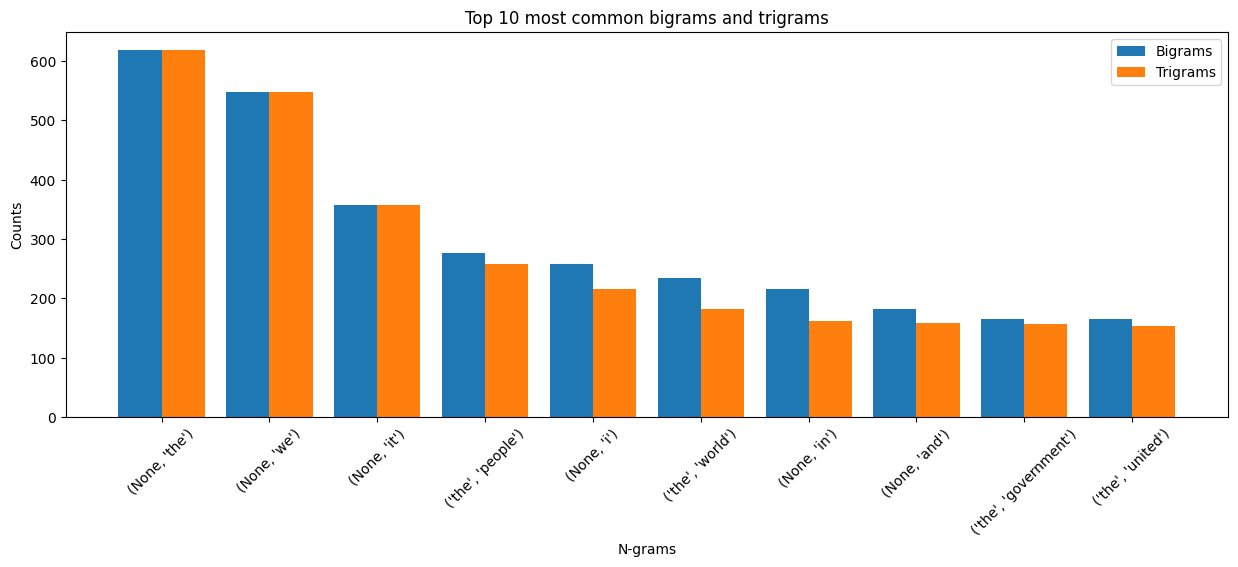

In [58]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Assuming 'bigram' and 'trigram' are lists of bigram and trigram tuples
freq_bi = FreqDist(bigram)
freq_tri = FreqDist(trigram)

# Get the most common bigrams and trigrams
most_common_bigrams = freq_bi.most_common(10)
most_common_trigrams = freq_tri.most_common(10)

# Extract the bigrams/trigrams and their counts
bigrams, bi_counts = zip(*most_common_bigrams)
trigrams, tri_counts = zip(*most_common_trigrams)

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))

# Plot bigrams
bi_x = range(len(bigrams))
ax.bar(bi_x, bi_counts, width=0.4, label='Bigrams', align='center')

# Plot trigrams
tri_x = [x + 0.4 for x in bi_x]  # Offset the trigrams on the x-axis
ax.bar(tri_x, tri_counts, width=0.4, label='Trigrams', align='center')

# Formatting the plot
ax.set_xlabel('N-grams')
ax.set_ylabel('Counts')
ax.set_title('Top 10 most common bigrams and trigrams')
ax.legend()

# Set the x-ticks to be the middle of the two bars
ax.set_xticks([x + 0.2 for x in bi_x])
ax.set_xticklabels(bigrams, rotation=45)

# Display the plot
plt.show()

In [59]:
trigrams

((None, None, 'the'),
 (None, None, 'we'),
 (None, None, 'it'),
 (None, None, 'i'),
 (None, None, 'in'),
 (None, None, 'and'),
 (None, None, 'but'),
 (None, None, 'our'),
 (None, 'it', 'is'),
 ('the', 'united', 'states'))

In [78]:
# Removing 'None' from tri-gram

freq_tri = FreqDist(filtered_trigrams)

# Assuming trigram is a list of trigram tuples
filtered_trigrams = [(a, b, c) for a, b, c in trigram if a is not None and b is not None and c is not None]

# Then create your frequency distribution from the filtered list
freq_tri = FreqDist(filtered_trigrams)


- Transforming a trigram frequency distribution into a bigram-to-word frequency mapping. 
- For each bigram (a, b), it keeps track of how often each subsequent word c follows it. 
- This structure can be used for next word in a sequence given the two previous words (a bigram).

In [79]:
# generate frequency of n-grams 

d = defaultdict(Counter) 
for a, b, c in freq_tri: 
    if a is not None and b is not None and c is not None: 
        d[a, b][c] += freq_tri[a, b, c]

In [80]:
freq_tri

FreqDist({('the', 'united', 'states'): 153, ('of', 'the', 'united'): 100, ('of', 'the', 'people'): 99, ('of', 'the', 'government'): 79, ('of', 'the', 'world'): 66, ('of', 'our', 'country'): 50, ('of', 'the', 'union'): 49, ('of', 'our', 'people'): 48, ('as', 'well', 'as'): 47, ('of', 'the', 'country'): 47, ...})

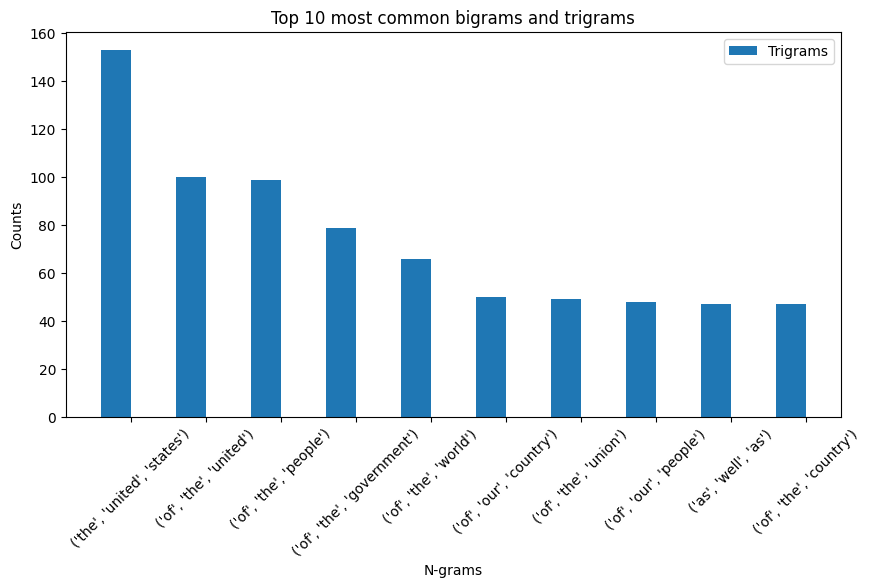

In [81]:
most_common_trigrams = freq_tri.most_common(10)

# Extract the bigrams/trigrams and their counts

trigrams, tri_counts = zip(*most_common_trigrams)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))


# Plot trigrams
tri_x = [x + 0.4 for x in tri_x]  # Offset the trigrams on the x-axis
ax.bar(tri_x, tri_counts, width=0.4, label='Trigrams', align='center')

# Formatting the plot
ax.set_xlabel('N-grams')
ax.set_ylabel('Counts')
ax.set_title('Top 10 most common bigrams and trigrams')
ax.legend()

# Set the x-ticks to be the middle of the two bars
ax.set_xticks([x + 0.2 for x in tri_x])
ax.set_xticklabels(trigrams, rotation=45)

# Display the plot
plt.show()

In [82]:
# Next word prediction       
s='' 
def pick_word(counter): 
    "Chooses a random element."
    return random.choice(list(counter.elements())) 
prefix = "he", "said"
print(" ".join(prefix)) 
s = " ".join(prefix) 
for i in range(19): 
    suffix = pick_word(d[prefix]) 
    s=s+' '+suffix 
    print(s) 
    prefix = prefix[1], suffix 

he said
he said "
he said " it
he said " it carries
he said " it carries me
he said " it carries me back
he said " it carries me back to
he said " it carries me back to the
he said " it carries me back to the zeal
he said " it carries me back to the zeal of
he said " it carries me back to the zeal of the
he said " it carries me back to the zeal of the industrial
he said " it carries me back to the zeal of the industrial activity
he said " it carries me back to the zeal of the industrial activity in
he said " it carries me back to the zeal of the industrial activity in the
he said " it carries me back to the zeal of the industrial activity in the problems
he said " it carries me back to the zeal of the industrial activity in the problems of
he said " it carries me back to the zeal of the industrial activity in the problems of progress
he said " it carries me back to the zeal of the industrial activity in the problems of progress throughout
he said " it carries me back to the zeal of the